
We need to train a model that predicts if a customer will leave the bank or not.



In [1]:
import pandas as pd

In [2]:
##from google.colab import drive
#drive.mount('/content/drive')

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')  
#Kaggle database (source: https://www.kaggle.com/aakash50897/churn-modellingcsv?select=Churn_Modelling.csv)
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
print(dataset.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [5]:
print(dataset.index)

RangeIndex(start=0, stop=10000, step=1)


In [6]:
#Not all independent variables are important for the result (such as RowNumber, CustomerId)
X = dataset.iloc[:, 3: 13].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [7]:
#labels
y = dataset.iloc[:, 13].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [8]:
#Data encoding :
#We have to encode categorical data (such as Geography and Gender)
#ORDINAL ENCODING - way 1:
from sklearn.preprocessing import LabelEncoder

X_ord_1 = dataset.iloc[:, 3: 13].values

labelencoder_X = LabelEncoder() #instantiate an object of the class LabelEncoder
X_ord_1[:, 1] = labelencoder_X.fit_transform(X_ord_1[:, 1]) #ordinal encoding for column 1

X_ord_1[:, 2] = labelencoder_X.fit_transform(X_ord_1[:, 2]) #ordinal encoding for column 2

X_ord_1

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
#ORDINAL ENCODING - way 2:  #bug - sets all values to zero!
from sklearn.preprocessing import OrdinalEncoder

X_ord_2 = dataset.iloc[:, 3: 13].values

ordinal_encoder_1 = OrdinalEncoder()
X_ord_2[:, 1] = ordinal_encoder_1.fit_transform([X_ord_2[:, 1]])
X_ord_2[:, 2] = ordinal_encoder_1.fit_transform([X_ord_2[:, 2]])

X_ord_2

array([[619, 0.0, 0.0, ..., 1, 1, 101348.88],
       [608, 0.0, 0.0, ..., 0, 1, 112542.58],
       [502, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [709, 0.0, 0.0, ..., 0, 1, 42085.58],
       [772, 0.0, 0.0, ..., 1, 0, 92888.52],
       [792, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [10]:
X = X_ord_1 

In [11]:
#ONE-HOT ENCODING :
#Way 1 : using data values :
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

ct = ColumnTransformer( #'encoder' is the name of the column transformer
    [('encoder', OneHotEncoder(), [1])],    # The column numbers to be transformed (here is [1] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)

X = np.array(ct.fit_transform(X), dtype=np.int64) #Note: The X matrix should be ordinally encoded (with ordinal encoding applied to it)
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,619,0,42,2,0,1,1,1,101348
1,0,0,1,608,0,41,1,83807,1,0,1,112542
2,1,0,0,502,0,42,8,159660,3,1,0,113931
3,1,0,0,699,0,39,1,0,2,0,0,93826
4,0,0,1,850,0,43,2,125510,1,1,1,79084
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270
9996,1,0,0,516,1,35,10,57369,1,1,1,101699
9997,1,0,0,709,0,36,7,0,1,0,1,42085
9998,0,1,0,772,1,42,3,75075,2,1,0,92888


In [12]:
#We remove the first column to avoid the dummy data trap
'''Dummy data trap : A scenario where independent variables are highly correlated (one variable predicts the value of others). 
In one-hot encoding, one dummy variable can be predicted through other dummy variables, thus causing redundancy
==> Using all dummy variables for regression models leads to dummy variable trap
==> We exclude one of those dummy variables.'''

X = X[:, 1:]
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,619,0,42,2,0,1,1,1,101348
1,0,1,608,0,41,1,83807,1,0,1,112542
2,0,0,502,0,42,8,159660,3,1,0,113931
3,0,0,699,0,39,1,0,2,0,0,93826
4,0,1,850,0,43,2,125510,1,1,1,79084
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270
9996,0,0,516,1,35,10,57369,1,1,1,101699
9997,0,0,709,0,36,7,0,1,0,1,42085
9998,1,0,772,1,42,3,75075,2,1,0,92888


In [13]:
#ONE-HOT ENCODING : Way 2 : using data frame :
X_df = dataset.iloc[:, 3: 13]
X_df = pd.concat([X_df, pd.get_dummies(X_df['Geography'], prefix='country', drop_first=True)], axis=1)  #drops the first column
#axis = 1 means to concatenate along the columns (put one column beside another)
X_df.drop(['Geography'], axis=1, inplace=True)  #get rid of the original Geography column
X_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_Germany,country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,False,False
9996,516,Male,35,10,57369.61,1,1,1,101699.77,False,False
9997,709,Female,36,7,0.00,1,0,1,42085.58,False,False
9998,772,Male,42,3,75075.31,2,1,0,92888.52,True,False


In [14]:
# Split the data into training and test set (20% for the test set)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 1) # We use random_state to make sure splitting contains the same data each time.

In [15]:
#Standardise the data (x_standardised = (x - x_mean)/std_dev)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #note that we use the scale set from the training set to transform the test set
df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1.714901,-0.572731,-0.230820,0.915091,-0.944500,-0.701742,0.588164,0.802257,-1.553374,0.977259,0.427402
1,-0.583124,-0.572731,-0.251509,-1.092788,-0.944500,-0.355203,0.469851,0.802257,-1.553374,-1.023271,-1.025493
2,1.714901,-0.572731,-0.396330,-1.092788,0.774987,0.337876,0.858782,-0.911510,0.643760,0.977259,-0.944793
3,1.714901,-0.572731,-0.044622,-1.092788,1.252622,0.337876,0.565605,0.802257,-1.553374,0.977259,-0.551941
4,-0.583124,1.746019,0.658795,0.915091,-0.562392,1.030954,0.730400,-0.911510,-1.553374,-1.023271,1.083388
...,...,...,...,...,...,...,...,...,...,...,...
7995,1.714901,-0.572731,-0.303231,0.915091,0.774987,0.684415,0.495441,-0.911510,0.643760,0.977259,-0.579177
7996,1.714901,-0.572731,0.348464,-1.092788,2.303420,-0.701742,0.076671,-0.911510,0.643760,-1.023271,-0.529777
7997,-0.583124,-0.572731,0.224332,-1.092788,0.583933,1.377494,-1.225991,-0.911510,0.643760,0.977259,-0.140972
7998,-0.583124,-0.572731,0.131233,-1.092788,0.010771,1.030954,-1.225991,0.802257,0.643760,0.977259,0.017805


In [16]:
#Check if tensorFlowconfiguration is OK
import tensorflow as tf; 
print("Check CPU : ")
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print("Check GPU : ")
print(tf.config.list_physical_devices('GPU'))

Check CPU : 
tf.Tensor(3776.852, shape=(), dtype=float32)
Check GPU : 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [17]:
#Building the model : 
#We use 2 dense layers

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

#add first hidden layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))

#add 2nd hidden layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))

'''The number of units is mainly chosen by experience. In general, based on experimentation, 
setting it to the average between the number of the input nodes (11) and the number of the 
ouput nodes (1). Cross-validation can also be used to choose to choose the best parameters (parameter tuning).'''

'''random_uniform: Weights are initialized to uniformly random small values between -0.05 to 0.05.
random_normal: Weights are initialized according to a Gaussian distribution, with zero mean and a small standard deviation of 0.05.
zero: All weights are initialized to zero.'''


'random_uniform: Weights are initialized to uniformly random small values between -0.05 to 0.05.\nrandom_normal: Weights are initialized according to a Gaussian distribution, with zero mean and a small standard deviation of 0.05.\nzero: All weights are initialized to zero.'

In [18]:

#Add the output layer
model.add(keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) #Sigmoid for binary, Softmax for multiclass


In [19]:
import tensorflow as tf
from tensorflow.keras import layers

class NeuralNetwork(tf.keras.Model):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# Instantiate the model, loss function, and optimizer
model = NeuralNetwork()
criterion = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [20]:

#Compilation
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])


In [21]:

#Training
history = model.fit(X_train, y_train, batch_size = 10, epochs = 200, verbose=2)

Epoch 1/200


800/800 - 4s - loss: 0.4336 - accuracy: 0.8155 - 4s/epoch - 5ms/step
Epoch 2/200
800/800 - 3s - loss: 0.3808 - accuracy: 0.8413 - 3s/epoch - 3ms/step
Epoch 3/200
800/800 - 3s - loss: 0.3607 - accuracy: 0.8503 - 3s/epoch - 3ms/step
Epoch 4/200
800/800 - 3s - loss: 0.3535 - accuracy: 0.8550 - 3s/epoch - 3ms/step
Epoch 5/200
800/800 - 3s - loss: 0.3484 - accuracy: 0.8554 - 3s/epoch - 3ms/step
Epoch 6/200
800/800 - 3s - loss: 0.3457 - accuracy: 0.8568 - 3s/epoch - 4ms/step
Epoch 7/200
800/800 - 3s - loss: 0.3442 - accuracy: 0.8597 - 3s/epoch - 4ms/step
Epoch 8/200
800/800 - 3s - loss: 0.3429 - accuracy: 0.8590 - 3s/epoch - 4ms/step
Epoch 9/200
800/800 - 3s - loss: 0.3422 - accuracy: 0.8577 - 3s/epoch - 3ms/step
Epoch 10/200
800/800 - 3s - loss: 0.3410 - accuracy: 0.8584 - 3s/epoch - 4ms/step
Epoch 11/200
800/800 - 3s - loss: 0.3388 - accuracy: 0.8612 - 3s/epoch - 4ms/step
Epoch 12/200
800/800 - 3s - loss: 0.3388 - accuracy: 0.8591 - 3s/epoch - 4ms/step
Epoch 13/200
800/800 - 3s - loss: 0.3

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.8525


In [23]:
'''
Note: If you want to personalize an optimizer, do the following:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)
'''

'''
Here are the parameters of the Adam optimizer:
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)
'''

'\nHere are the parameters of the Adam optimizer:\ntf.keras.optimizers.Adam(\n    learning_rate=0.001,\n    beta_1=0.9,\n    beta_2=0.999,\n    epsilon=1e-07,\n    amsgrad=False,\n    name="Adam",\n    **kwargs\n)\n'

In [24]:
'''
Note: You can use a learning rate schedule to modulate how the learning rate of your optimizer changes over time
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
'''

'\nNote: You can use a learning rate schedule to modulate how the learning rate of your optimizer changes over time\nlr_schedule = keras.optimizers.schedules.ExponentialDecay(\n    initial_learning_rate=1e-2,\n    decay_steps=10000,\n    decay_rate=0.9)\noptimizer = keras.optimizers.SGD(learning_rate=lr_schedule)\n'

In [25]:

#Evaluation
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)


63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [ True]]


In [26]:

#Predict using the info of a new customer
new_customer = [[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]
new_customer = sc.transform(new_customer)
new_prediction = model.predict(new_customer)
new_prediction = (new_prediction > 0.5)
print(new_prediction)


1/1 [==============================] - 0s 27ms/step
[[False]]


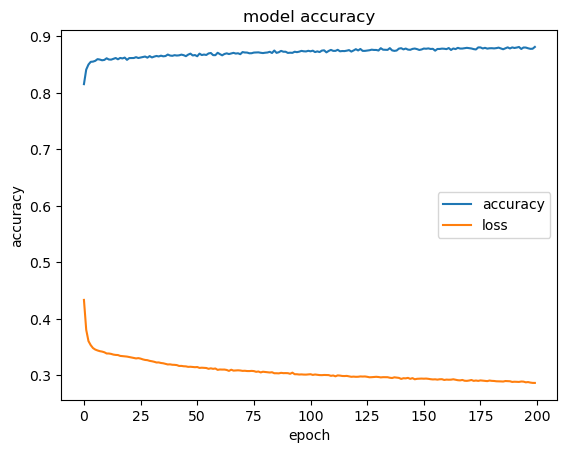

In [27]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'])
plt.show()

In [28]:
#Note : An alternative to using train_test_split() is to specify a validation_split percentage. 
#This is done when fitting the model, for example:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

history = model.fit(X,y, verbose = 1,
                    validation_split = 0.2, # split data in 80-20 sets
                    epochs = 100,
                    batch_size = 10)

Epoch 1/100
800/800 [==============================] - 5s 7ms/step - loss: 0.2981 - accuracy: 0.8765 - val_loss: 0.3177 - val_accuracy: 0.8730
Epoch 2/100
800/800 [==============================] - 5s 6ms/step - loss: 0.2959 - accuracy: 0.8745 - val_loss: 0.3134 - val_accuracy: 0.8760
Epoch 3/100
800/800 [==============================] - 4s 5ms/step - loss: 0.2953 - accuracy: 0.8741 - val_loss: 0.3123 - val_accuracy: 0.8725
Epoch 4/100
800/800 [==============================] - 4s 5ms/step - loss: 0.2940 - accuracy: 0.8777 - val_loss: 0.3217 - val_accuracy: 0.8685
Epoch 5/100
800/800 [==============================] - 4s 5ms/step - loss: 0.2942 - accuracy: 0.8756 - val_loss: 0.3198 - val_accuracy: 0.8690
Epoch 6/100
800/800 [==============================] - 4s 5ms/step - loss: 0.2934 - accuracy: 0.8756 - val_loss: 0.3230 - val_accuracy: 0.8725
Epoch 7/100
800/800 [==============================] - 4s 5ms/step - loss: 0.2919 - accuracy: 0.8784 - val_loss: 0.3262 - val_accuracy: 0.8670

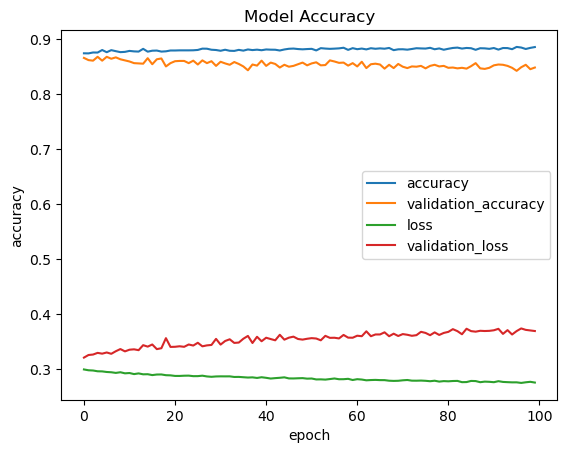

In [27]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['accuracy','validation_accuracy', 'loss', 'validation_loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [28]:
model.save('churn_model.h5')

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

In [ ]:
my_trained_model = keras.models.load_model('churn_model.h5')

#Using Pytorch

In [34]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    print("Using", device, "device")

Using cpu device


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train, X_test, y_test, and sc are defined

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(in_features=11, out_features=6)
        self.fc2 = nn.Linear(in_features=6, out_features=6)
        self.fc3 = nn.Linear(in_features=6, out_features=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

ModuleNotFoundError: No module named 'torch'

In [ ]:
# Training the model
for epoch in range(200):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/200], Loss: {loss.item():.4f}')

In [ ]:
# Evaluate the model on the test set
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred_tensor = (y_pred_tensor > 0.5).float()

    accuracy = torch.sum(y_pred_tensor == y_test_tensor.view(-1, 1)).item() / len(y_test_tensor)
    print(f'Test Accuracy: {accuracy:.4f}')


In [ ]:
# Make predictions for a new customer
new_customer_tensor = torch.Tensor([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])
new_customer_tensor = sc.transform(new_customer_tensor.numpy())
new_customer_tensor = torch.Tensor(new_customer_tensor)
new_prediction_tensor = model(new_customer_tensor)
new_prediction = (new_prediction_tensor > 0.5).item()
print(new_prediction)

In [ ]:
# Save the model
torch.save(model.state_dict(), 'churn_model.pth')
loaded_model = NeuralNetwork()
loaded_model.load_state_dict(torch.load('churn_model.pth'))
